# Importing the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('housing_train.csv',delimiter='\t')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


# DataFrame Description

     A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
     data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
     purpose, the company has collected a data set from the sale of houses in Australia. 

    The company is looking at prospective properties to buy houses to enter the market. We have to build a model 
    using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
    in them or not. For this company wants to know:

    • Which variables are important to predict the price of variable?

    • How do these variables describe the price of the house?
    Data contains 1460 entries each having 81 variables.
    Data contains Null values. Data contains numerical as well categorical       variable.


# Exploratory Data Analysis

In Data Analysis We will Analyze To Find out the below stuff.

1.Missing Values

2.All The Numerical Variables

3.Distribution of the Numerical Variables

4.Categorical Variables

5.Cardinality of Categorical Variables

6.Outliers

7.Relationship between independent and dependent feature(SalePrice)

In [3]:
df.shape


(1168, 81)

# Missing Values

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Checking the datatypes of the columns

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Statistical Analysis

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Separating the Numerical and Categorical features for analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [10]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Analyzing Numerical Data

# Outlier Detection

Checking percentage of outliers for all the numerical columns.

In [11]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.47
10,BsmtFinSF2,11.64
5,OverallCond,8.90
32,ScreenPorch,8.13
1,MSSubClass,6.76
8,MasVnrArea,6.59
2,LotFrontage,6.16
3,LotArea,6.08
18,BsmtHalfBath,5.39
29,OpenPorchSF,4.71


Comment:

Majority of the numeric features have outliers.

Dropping all the outliers will cause loss of information.

Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]

IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

Target column 'SalePrice' is excluded in this.

In [12]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = df[feature].quantile(.75) - df[feature].quantile(.25) 
        max_value = df[feature].quantile(.75)+1.5*IQR
        min_value = df[feature].quantile(.25)-1.5*IQR
        df[feature][df[feature] > max_value] = max_value
        df[feature][df[feature] < min_value ] = min_value

In [13]:
# Checking the dataset after reassigning minmum and maximum values

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.0,1168.0,1168.0,1168.0,1168.0,1168.000000,1168.000000,1168.000000
mean,724.136130,54.982877,69.894130,9671.869435,6.106164,5.566781,1970.958904,1984.758562,87.333333,440.206978,...,93.913099,42.927226,0.0,0.0,0.0,0.0,0.0,6.344178,2007.804795,181477.005993
std,416.159877,37.149385,19.241774,3514.692231,1.384464,0.973862,30.061548,20.785185,130.890807,434.416564,...,117.913672,53.496965,0.0,0.0,0.0,0.0,0.0,2.686352,1.329738,79105.586863
min,1.000000,20.000000,30.000000,1780.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,215000.000000
max,1460.000000,145.000000,110.000000,17356.500000,10.000000,7.500000,2010.000000,2010.000000,400.000000,1786.250000,...,427.500000,175.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


# Correlation in Numeric Data

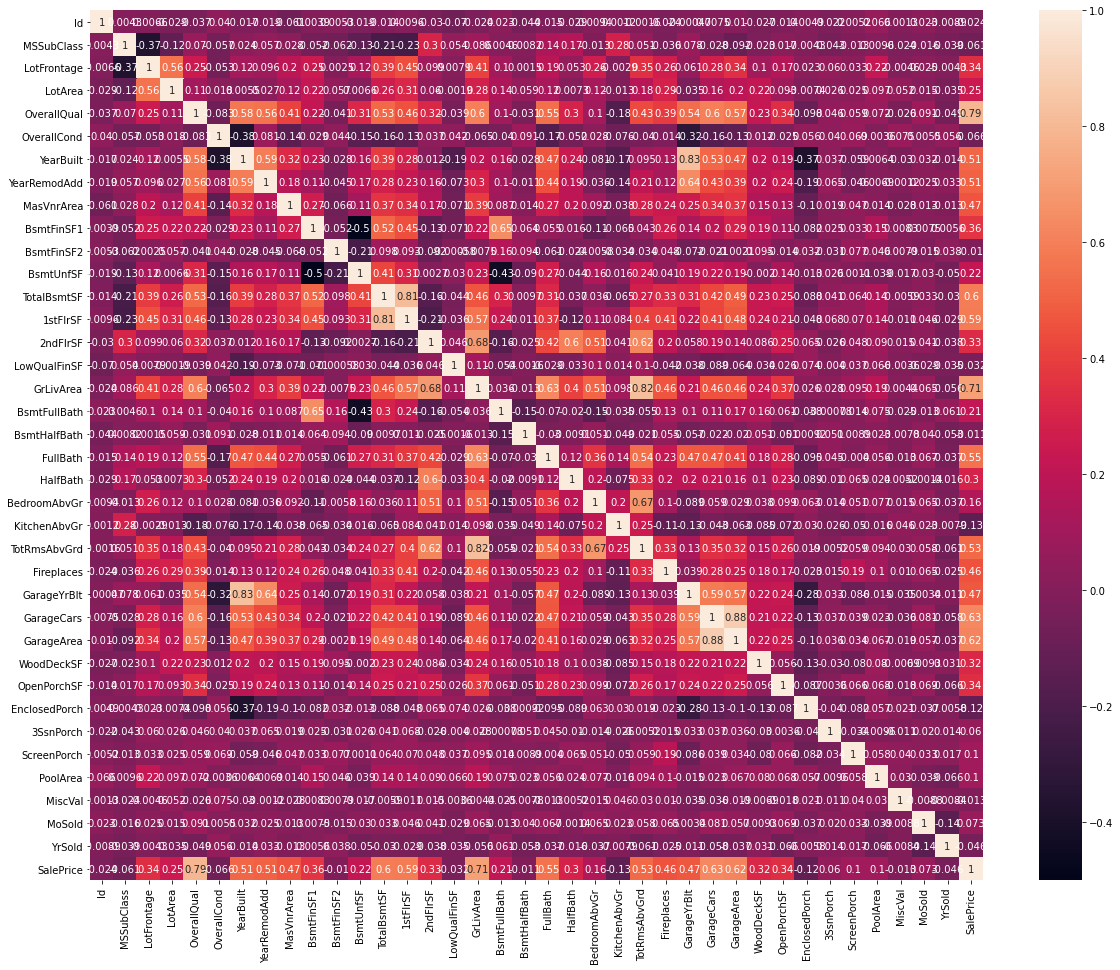

In [14]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Comment:
    Some of the features have high correlation with each other.
    
GarageCars and GarageArea (0.88)

GarageYrBlt and YearBuilt (0.83)

TotRmsAbvGrd and GrLivArea (0.83)

TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

# Univariate and Bivariate Analysis - Numerical Features



# Analyzing Numerical Features with continuous values

# Data Visualization

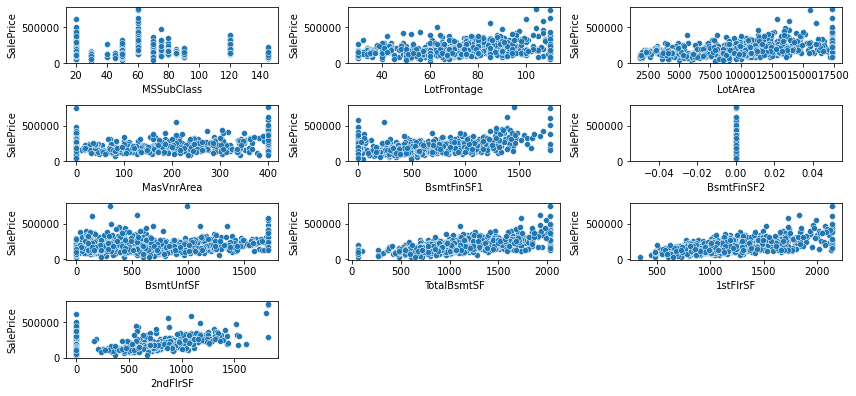

In [15]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(df[feature],df['SalePrice'])
    plt.tight_layout()

Comment:

Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.

'MSSubClass' has discrete values

'BsmtSF2' has single value and can be dropped.

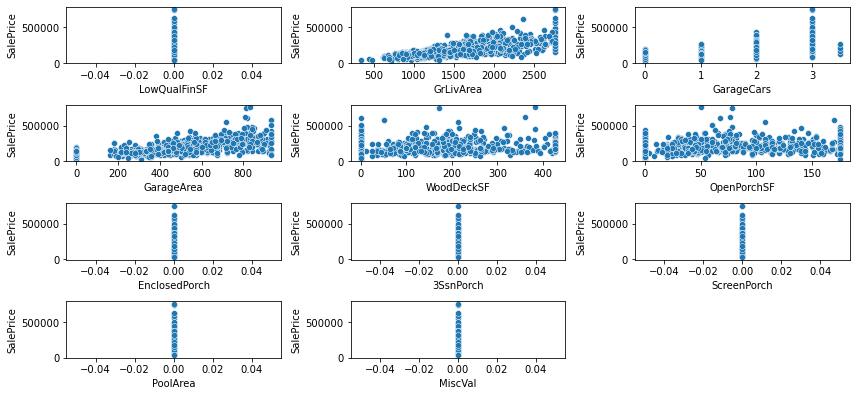

In [16]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(df[feature],df['SalePrice'])
    plt.tight_layout()


Comment:

'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.

'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

# Visualizing the distribution of the numeric features¶

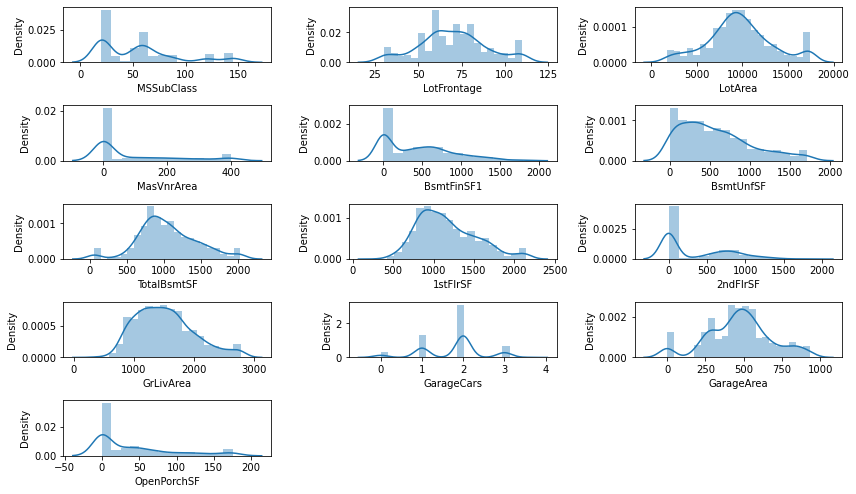

In [17]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(df[feature])
    plt.tight_layout()

In [18]:
df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.0,1168.0,1168.0,1168.0
mean,0.0,1513.293129,1.774829,474.148973,93.913099,42.927226,0.0,0.0,0.0,0.0,0.0
std,0.0,481.471291,0.741001,206.578078,117.913672,53.496965,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1143.250000,1.000000,338.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1468.500000,2.000000,480.000000,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1795.000000,2.000000,576.000000,171.000000,70.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2772.625000,3.500000,933.000000,427.500000,175.000000,0.0,0.0,0.0,0.0,0.0


Removing these features having fixed values as they won't contribute in predicting SalePrice.

In [19]:
df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.0,1168.0,1168.0,1168.0,1168.0,1168.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

# Analyzing Numerical Features with Discrete Values¶

In [21]:
df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,6,5.0,2,2007,0.0,0,2,0,2.0,1,5,1.0,1977.0,1976,1976
1,8,6.0,10,2007,1.0,0,2,0,4.0,1,8,1.0,1970.0,1970,1970
2,7,5.0,6,2007,1.0,0,2,1,3.0,1,8,1.0,1997.0,1996,1997
3,6,6.0,1,2010,0.0,0,2,0,3.0,1,7,1.0,1977.0,1977,1977
4,6,7.0,6,2009,0.0,0,2,0,3.0,1,8,1.0,1977.0,1977,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5,5.0,2,2010,0.0,0,1,0,3.0,1,5,0.0,1970.0,1967,1967
1164,4,5.0,5,2009,0.0,0,2,0,2.0,1,5,0.0,2002.0,1949,2003
1165,6,6.0,7,2009,0.0,0,2,1,3.0,1,7,1.0,1976.0,1976,1976
1166,4,4.0,7,2008,0.0,0,1,0,3.0,1,6,0.0,1920.0,1920,1950


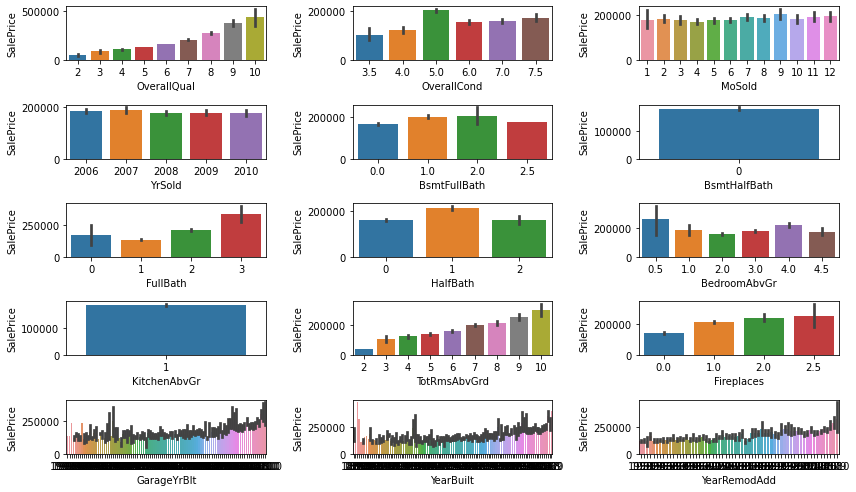

In [22]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(df[feature],df['SalePrice'])
    plt.tight_layout()

Comment: Following are the observations from the plots.

'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

'OverallCond' : SalePrice is highest for rating 5

'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice

'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : Will extract new features from to identify any trend

'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight.

In [23]:
df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1168.000000,1168.0,1104.000000,1168.000000,1168.000000
mean,0.425086,1.0,1978.193841,1970.958904,1984.758562
std,0.519702,0.0,24.890704,30.061548,20.785185
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1966.000000
50%,0.000000,1.0,1980.000000,1972.000000,1993.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [24]:

print(df['BsmtFullBath'].value_counts())
print(df['KitchenAbvGr'].value_counts())

0.0    686
1.0    468
2.0     13
2.5      1
Name: BsmtFullBath, dtype: int64
1    1168
Name: KitchenAbvGr, dtype: int64


In [25]:
# dropping KitchenAbvGr for not having useful information
df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [26]:
df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1104.000000,1168.000000,1168.000000,1168.000000
mean,1978.193841,1970.958904,1984.758562,2007.804795
std,24.890704,30.061548,20.785185,1.329738
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1966.000000,2007.000000
50%,1980.000000,1972.000000,1993.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


# Data Preprocessing

In [27]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    df[feature] = 2021 - df[feature]
    

In [28]:
df[feature]

0       14
1       14
2       14
3       11
4       12
        ..
1163    11
1164    12
1165    12
1166    13
1167    15
Name: YrSold, Length: 1168, dtype: int64

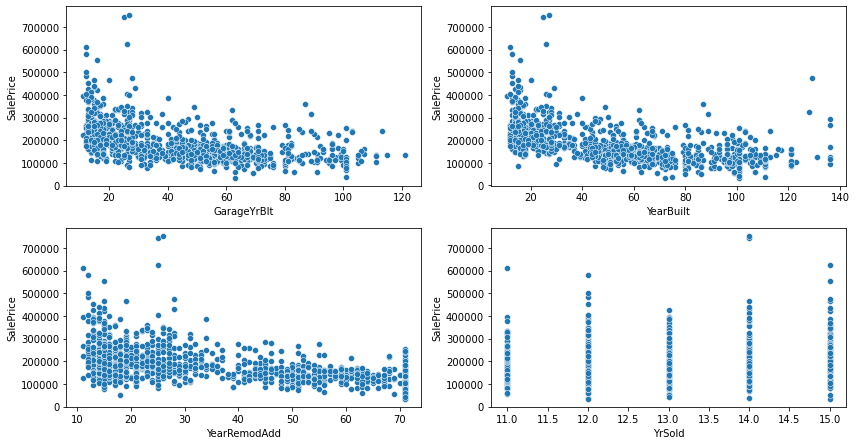

In [29]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(df[feature], df['SalePrice'])
    plt.tight_layout()

Comment:

For most the realty properties Garage is built within last 20 years, SalePrice is more recently built garages.

SalePrice is more lower value of YearBuilt i.e. more recently build houses

Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice

YrSold still does not show any significant trend.

# Missing Value Handling - Numerical Features

In [30]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.select_dtypes(exclude=['object']).columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  5.0


In [31]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

df = df[~df['MasVnrArea'].isnull()]
df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [32]:
# Checking the number of remaining columns
df.columns.shape

(73,)


Comment:

GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars.

GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value

TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea

TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF

Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [33]:

df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(df.columns.shape)

(69,)


# Analyzing Categorical Features

In [34]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Missing Value Handling - Categorical Features

In [35]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.select_dtypes(include=['object']).columns:
    if df[feat].isnull().any():
        print(feat, ':', round(df[feat].isnull().sum()/df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 93.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 99.0
Fence : 80.0
MiscFeature : 96.0


In [36]:
df['Electrical'].isnull().sum()

0

In [37]:

df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Comment:

For 'Alley', Nan means 'No access to alley'.

For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'

For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'

For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively

MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [38]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(df[mv_categorical_features].isnull().sum())

Alley           1085
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
FireplaceQu      548
Fence            924
MiscFeature     1117
dtype: int64


In [39]:
# Imputing missing values with "Not_applicable"
df[mv_categorical_features] = df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [40]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
df.dropna(subset=['Electrical'], inplace=True)

In [41]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ':', round(df[feat].isnull().sum()/df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [42]:
df.columns.shape

(68,)

Encoding For Categorical Variables Ordered Features -- to be label encoded 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

Unordered Features -- to be one hot encoded 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [43]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df['SalePrice'],df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

# Analyzing Ordered Features

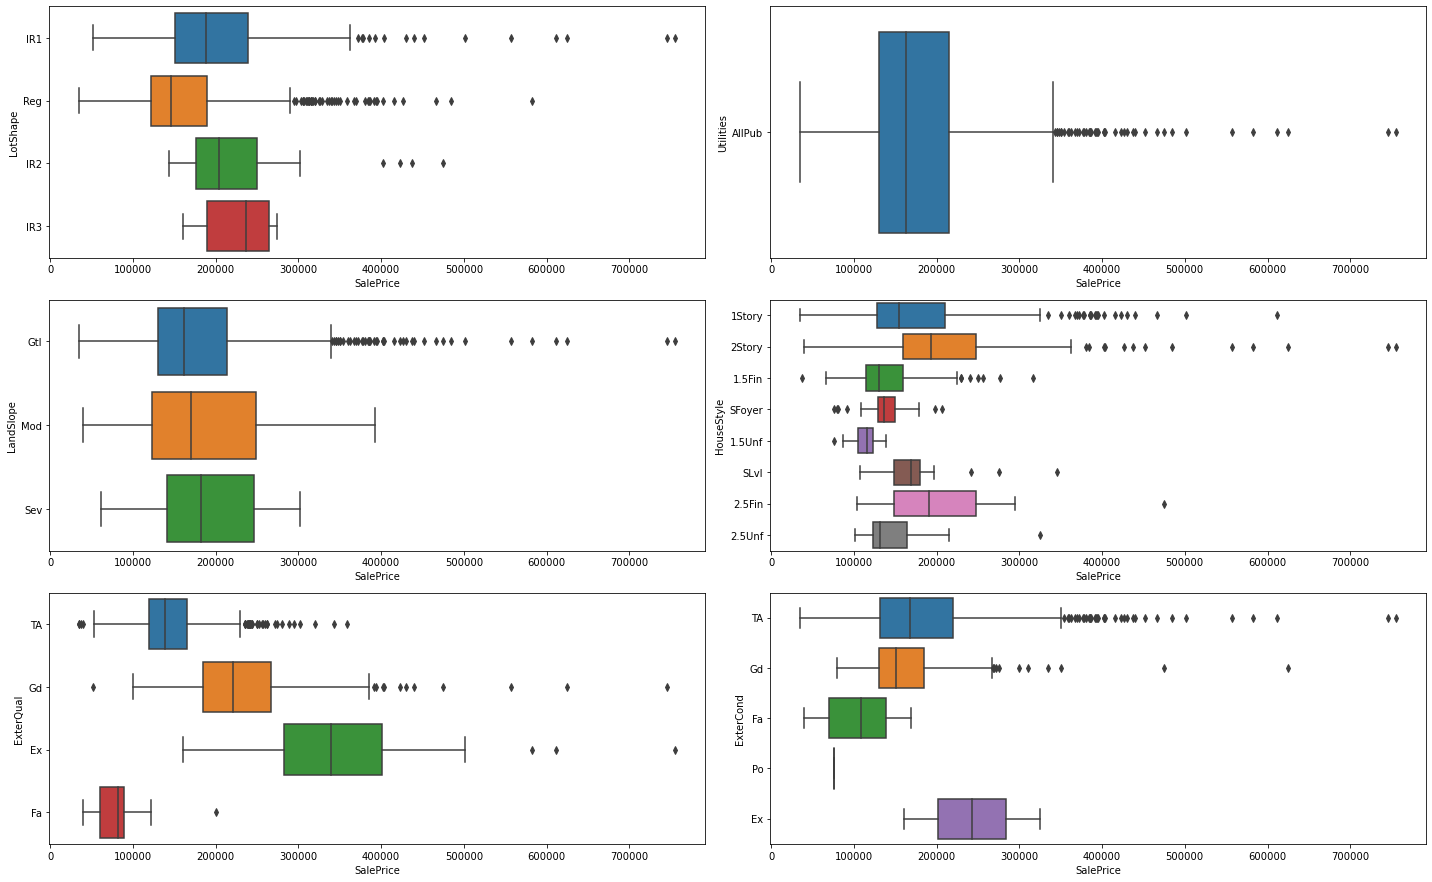

In [44]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

Comment:

'LotShape' : Slightly irregular LotShape have the highest SalePrice.
    
'Utilities' : Most of the houses in the dataset have all the public utilities
    
'LandSlope' : Houses at severe land slope have lowest SalePrice
    
'HouseStyle' : 2 storied houses have the highest SalePrice
    
'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
    
'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

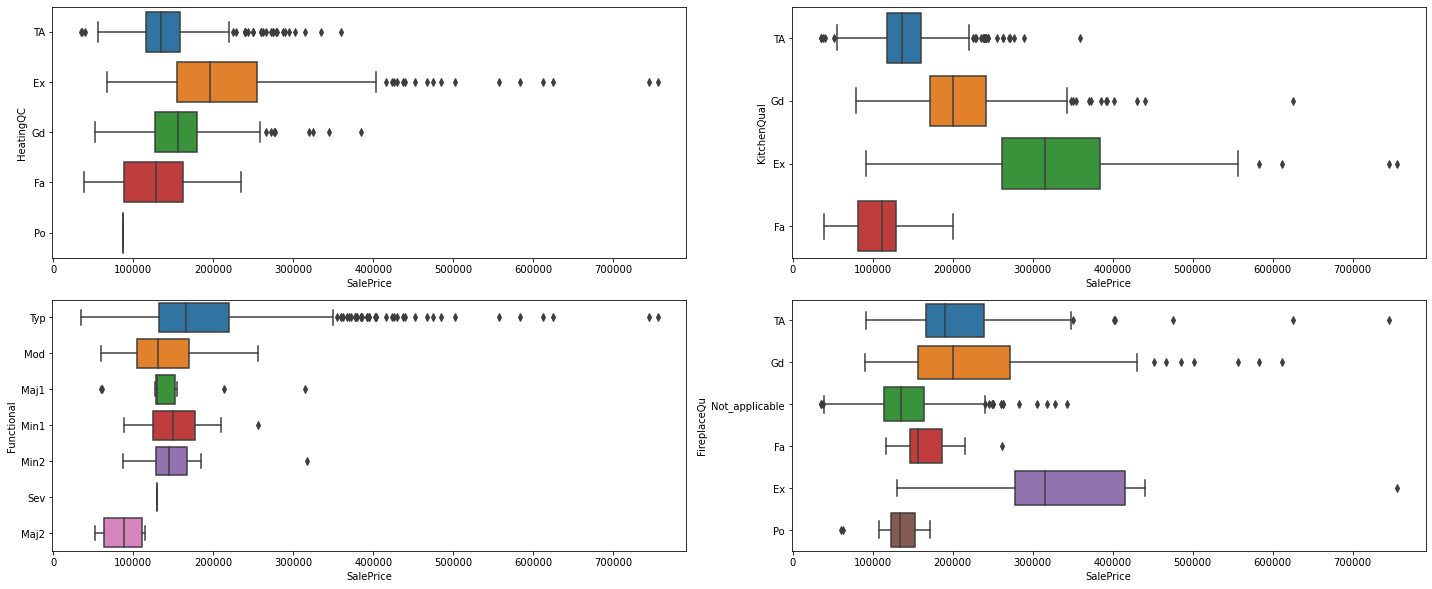

In [45]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

Comment:

Houses having excellent heating quality and kitchen quality have the highest SalePrice.

Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.

SalePrice range in largest for houses with average fireplace quality.

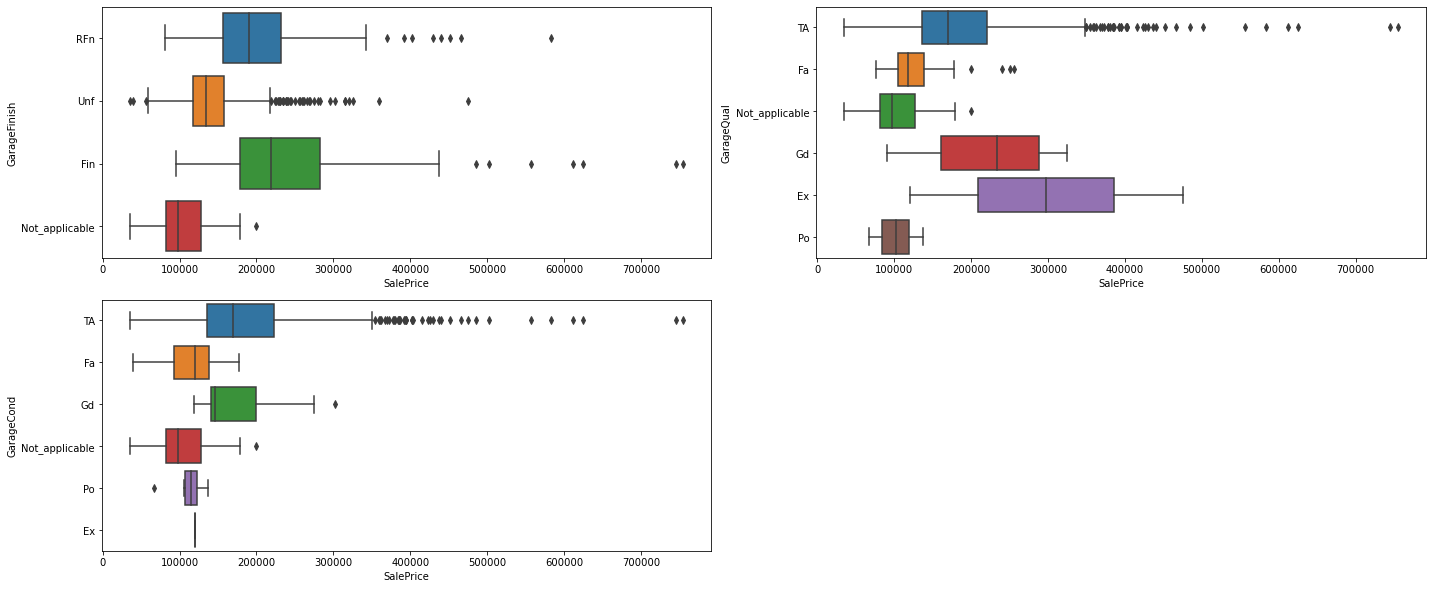

In [46]:

garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

Comment:

SalePrice is highest where garage is finished.

The range of SalePrice is widest for Typical/Average Garage quality and condition.

There are very few houses with excellect condition of garage.

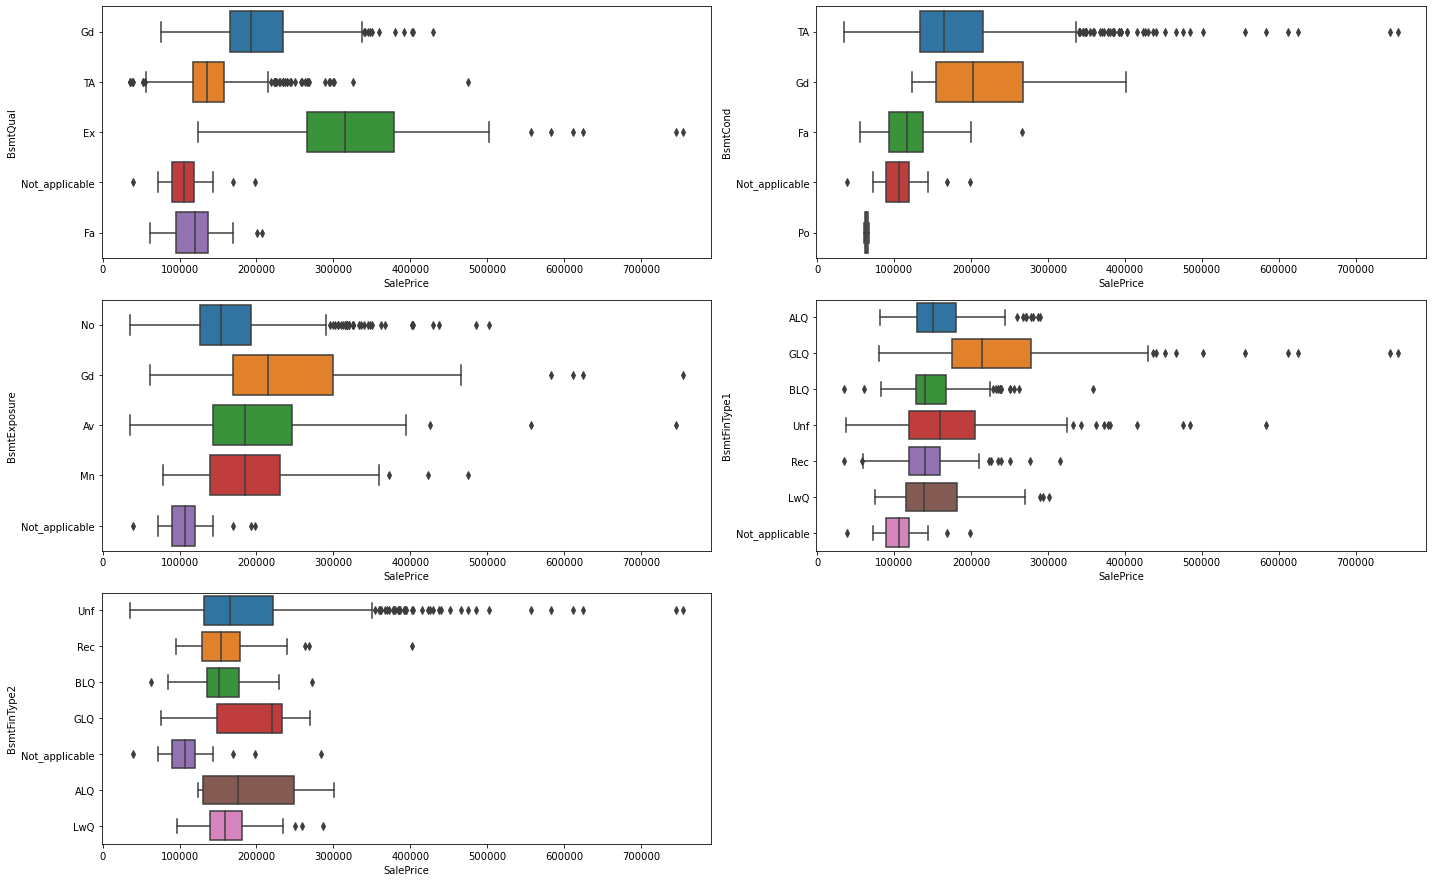

In [47]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

Comment:

Houses with excellent quality basement have the highest SalePrice.

Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice

A lot of houses have unfinished basment or no basement (label = Not_applicable)

# Encoding Categorical Features

In [48]:
df['LotShape'] = df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Utilities'] = df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y':1})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['Functional'] = df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df['FireplaceQu'] = df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [49]:
# Checking the features after encoding

df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1167
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1161 non-null   int64
 1   Utilities     1161 non-null   int64
 2   LandSlope     1161 non-null   int64
 3   HouseStyle    1161 non-null   int64
 4   ExterQual     1161 non-null   int64
 5   ExterCond     1161 non-null   int64
 6   BsmtQual      1161 non-null   int64
 7   BsmtCond      1161 non-null   int64
 8   BsmtExposure  1161 non-null   int64
 9   BsmtFinType1  1161 non-null   int64
 10  BsmtFinType2  1161 non-null   int64
 11  HeatingQC     1161 non-null   int64
 12  KitchenQual   1161 non-null   int64
 13  Functional    1161 non-null   int64
 14  FireplaceQu   1161 non-null   int64
 15  GarageFinish  1161 non-null   int64
 16  GarageQual    1161 non-null   int64
 17  GarageCond    1161 non-null   int64
dtypes: int64(18)
memory usage: 212.3 KB


# Analyzing Unordered Featues

In [50]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

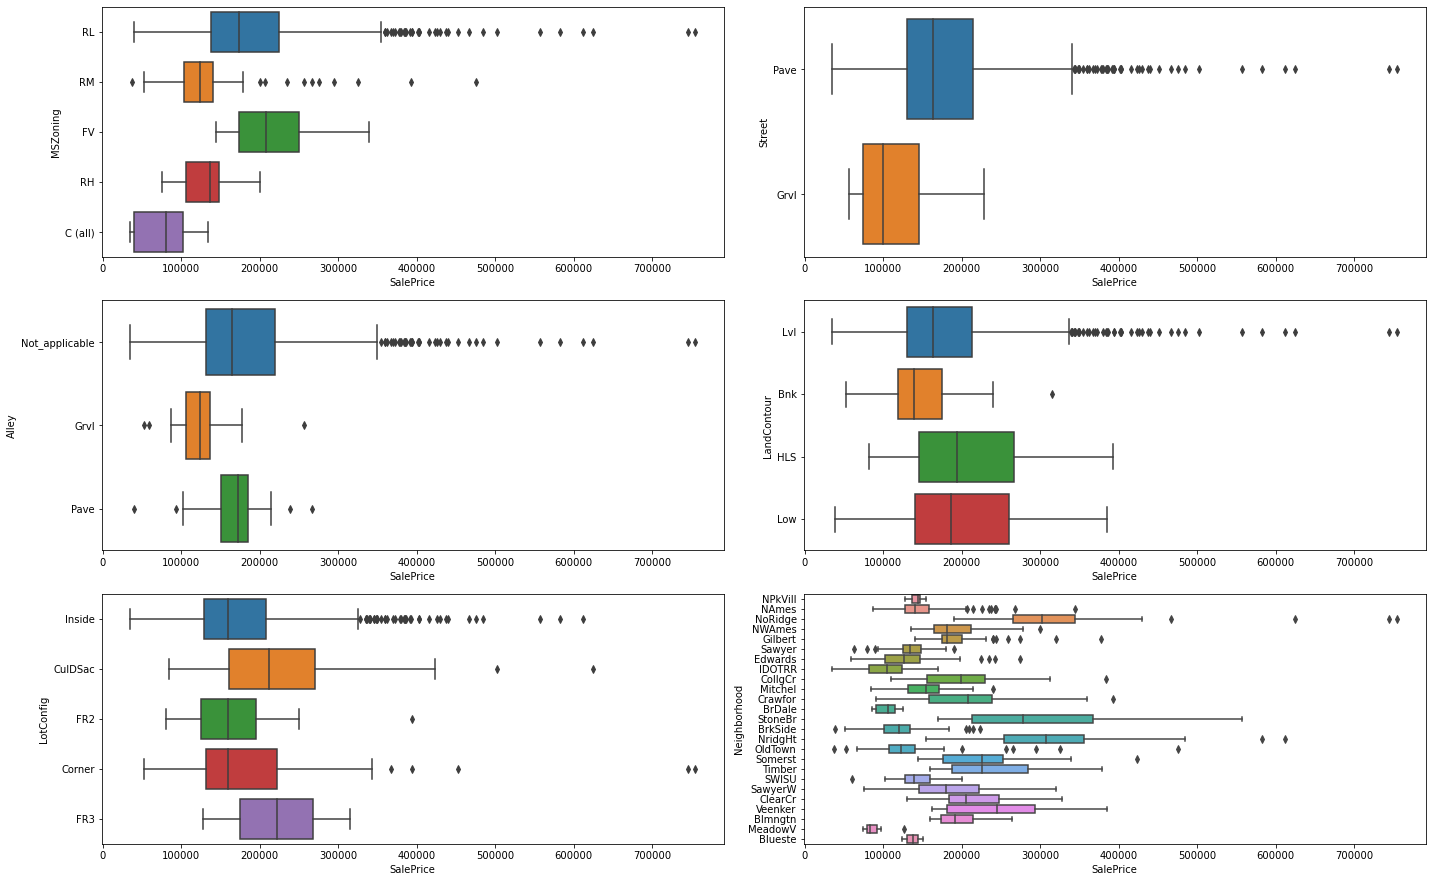

In [51]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

Comment:

Most of the houses do not have alley.

Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns

Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

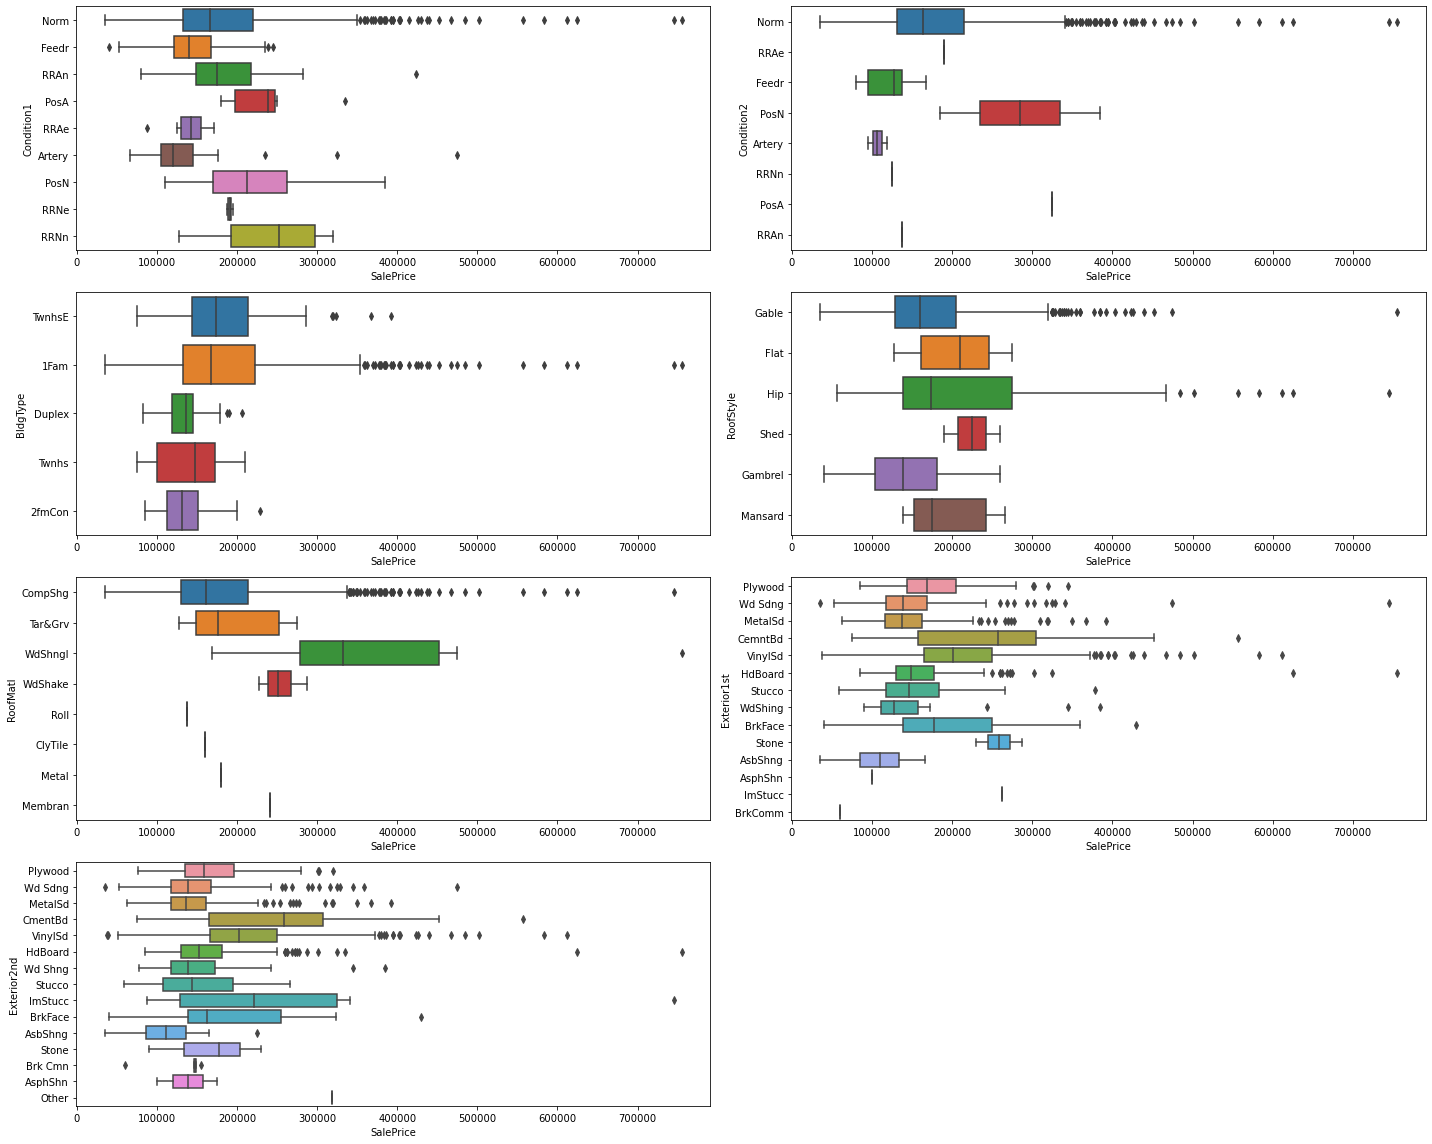

In [52]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

Comment:

Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice.

Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

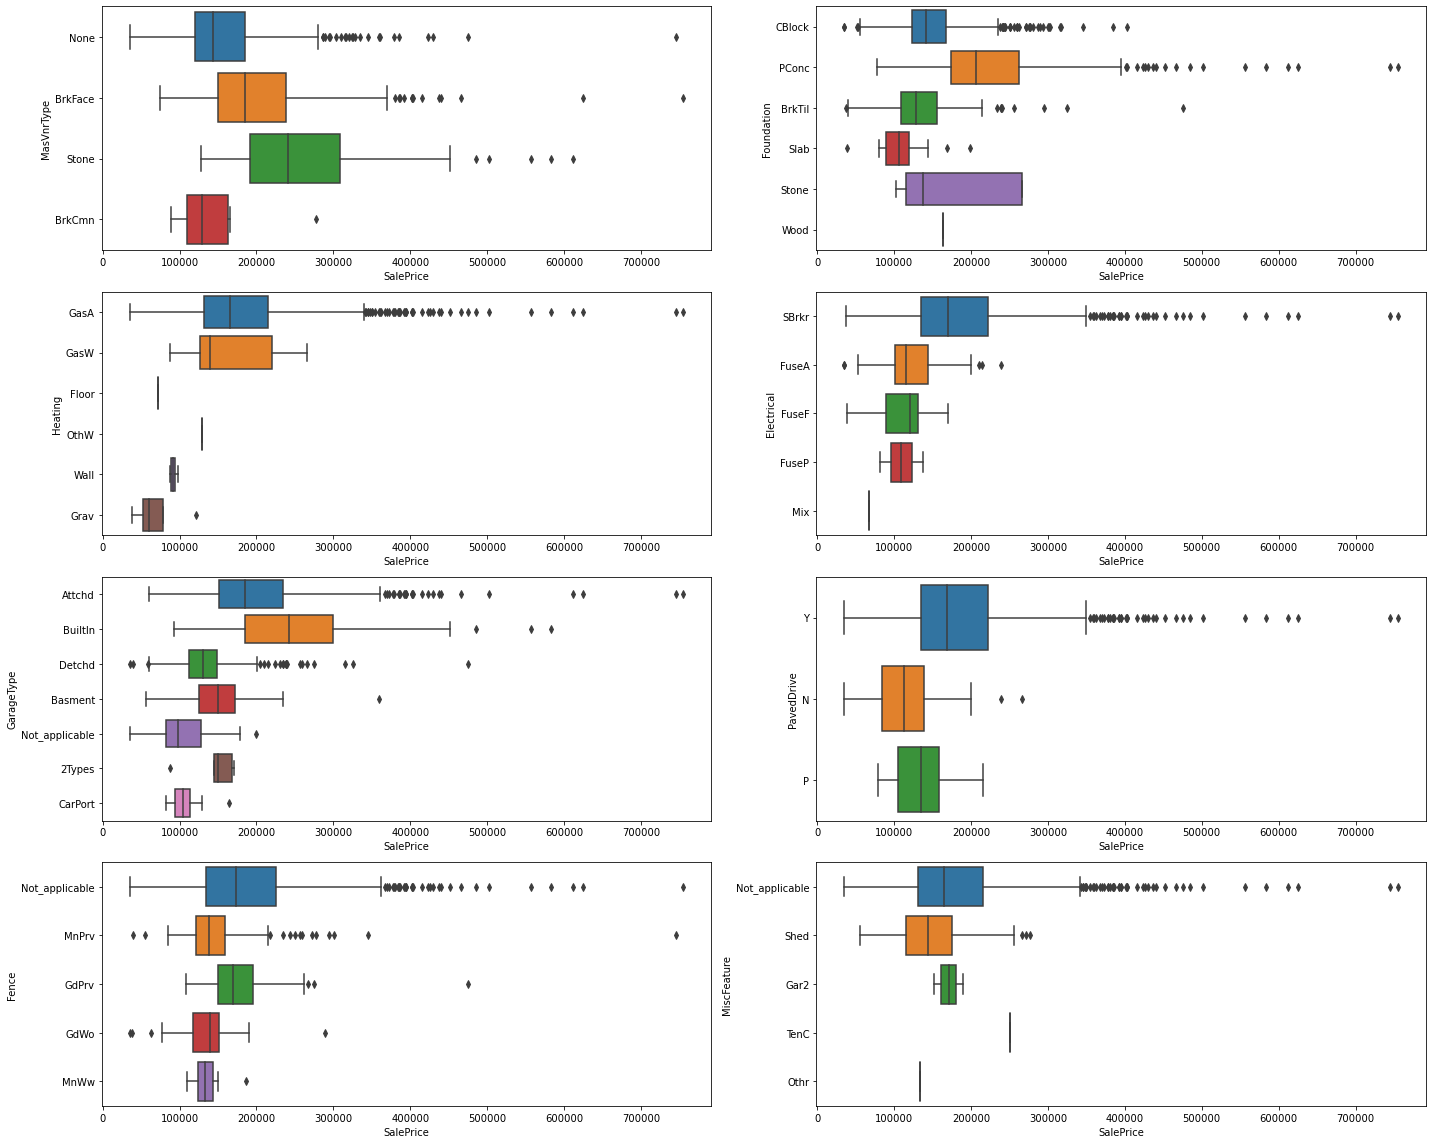

In [53]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

Comment:

Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

Houses with attached and built-in garage have high SalePrice

Most of the houses do not have fence (Fence= Not_applicable)

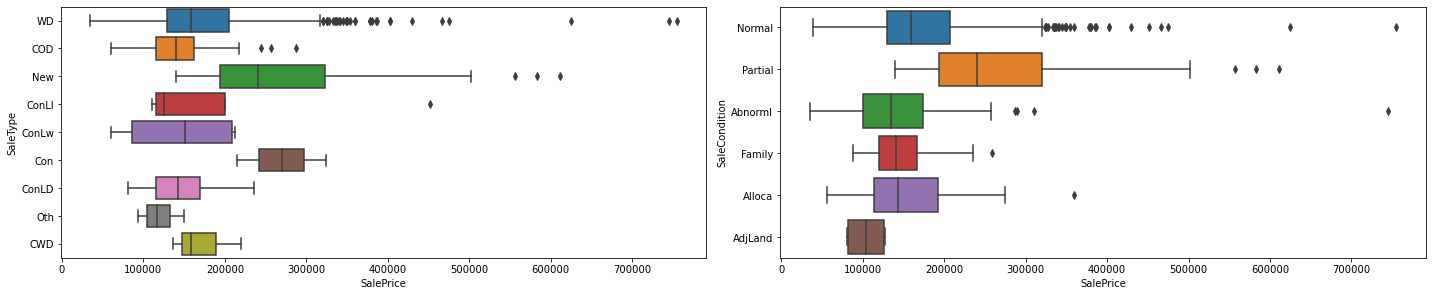

In [54]:
generate_boxplot(['SaleType','SaleCondition'])

Comment:

Most of the houses are newly built, houses with warranty deed have high SalePrice.

Sale condition = Normal leads to high SalePrice

# Encoding Categorical Variables

In [55]:
dummy_df = pd.get_dummies(df[unordered_features], drop_first=True)

In [56]:

dummy_df.shape

(1161, 142)

Comment:

Adding 144 features to the existing dataset will make the model very complex.

From the above boxplots, for some categorical features only label is dominating over others.

In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [57]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [58]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1161, 52)


In [59]:
df.shape

(1161, 68)

In [60]:
# Adding the dummy variables to the original dataframe
df = pd.concat([df,dummy_df],axis=1)

# Dropping the redundant columns
df = df.drop(unordered_features,axis=1)

In [61]:
df.shape

(1161, 97)

# Splitting into Train and Test Data

In [62]:

X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,120,NaN,4928.0,0,3,0,0,6,5.0,45,...,0,0,1,0,1,1,0,1,1,0
1,20,95.0,15865.0,0,3,1,0,8,6.0,51,...,0,0,1,0,1,1,0,1,1,0
2,60,92.0,9920.0,0,3,0,3,7,5.0,25,...,0,0,1,0,1,1,0,1,1,0
3,20,105.0,11751.0,0,3,0,0,6,6.0,44,...,0,0,1,1,0,1,0,0,1,0
4,20,NaN,16635.0,0,3,0,0,6,7.0,44,...,0,0,1,0,1,1,0,1,1,0


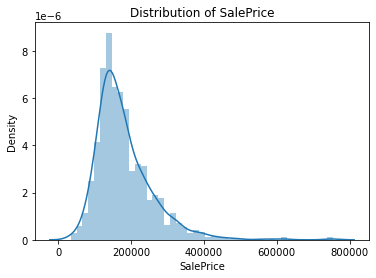

In [63]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()


Comment: Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

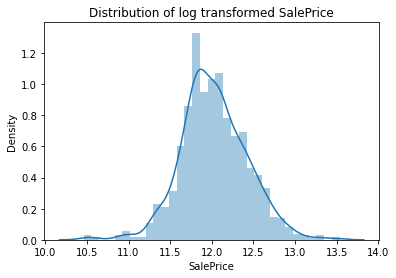

In [64]:
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [65]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(df['SalePrice'])
print(y)

0       11.759786
1       12.498742
2       12.505399
3       12.154779
4       12.278393
          ...    
1163    11.711776
1164    11.589887
1165    11.908340
1166    10.596635
1167    12.118334
Name: SalePrice, Length: 1161, dtype: float64


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(928, 96)
(233, 96)
(928,)
(233,)


In [68]:
X['LotFrontage'].isnull().any()

True

In [69]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [70]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [71]:

X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

# Transformation of the data

# Feature Scaling

In [72]:

X_train.values

array([[6.0000e+01, 6.9000e+01, 9.5880e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.0000e+01, 7.3000e+01, 8.7600e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+01, 1.1000e+02, 1.4442e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 6.0000e+01, 1.0410e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2000e+02, 4.0000e+01, 4.6710e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 8.0000e+01, 1.2984e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [73]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [74]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [75]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

     MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      0.120692    -0.048336 -0.016668 -1.374625        0.0  -0.220360   
1      0.120692     0.179162 -0.252924  0.750281        0.0  -0.220360   
2     -0.945998     2.283521  1.368343  0.750281        0.0  -0.220360   
3      0.120692     0.577284  0.169370  0.750281        0.0  -0.220360   
4     -0.945998     1.146030  1.275038 -1.374625        0.0  -0.220360   
..          ...          ...       ...       ...        ...        ...   
923    2.387410    -0.560207  0.064652  0.750281        0.0  -0.220360   
924    2.387410     0.000000  2.199948  0.750281        0.0   3.245634   
925   -0.145980    -0.560207  0.217876  0.750281        0.0  -0.220360   
926    1.720728    -1.697698 -1.419655 -1.374625        0.0  -0.220360   
927   -0.945998     0.577284  0.952326  0.750281        0.0  -0.220360   

     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      0.683176     1.380450   

# Linear Regression

# Initial Feature Selection with RFE

In [76]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [77]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageCond', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'Fence_MnPrv', 'Fence_Not_applicable', 'SaleType_New', 'SaleCondition_Normal']
Top 50 features : 
['MSSubClass', 'LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC'

In [78]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [79]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:06:20   Log-Likelihood:                 637.73
No. Observations:                 928   AIC:                            -1185.
Df Residuals:                     883   BIC:                            -968.0
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [80]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:06:20   Log-Likelihood:                 640.81
No. Observations:                 928   AIC:                            -1186.
Df Residuals:                     880   BIC:                            -953.6
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [81]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:06:28   Log-Likelihood:                 646.19
No. Observations:                 928   AIC:                            -1186.
Df Residuals:                     875   BIC:                            -930.2
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Comment: By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [82]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

# Hyper Parameter Tuning , Cross-Validation 

In [83]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

# Ridge Regression

In [84]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9043182431621672
R2 score (test) :  0.8895257621556744
RMSE (train) :  0.12159066631396581
RMSE (test) :  0.13692171167192044


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.7s finished


Comment: Ridge Regression model was able to achieve R2 score of 0.88 on test data i.e. 88% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1369 on test data, that means the prediction made by the model can off by 0.1369 unit.

# Lasso Regression

In [85]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9037844937307499
R2 score (test) :  0.8913203632784276
RMSE (train) :  0.12192933428438224
RMSE (test) :  0.13580504433333074


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


# Comparing Model Coefficients¶

In [86]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.013995,-0.011786
LotArea,0.031863,0.029625
Utilities,0.000000,0.000000
OverallQual,0.078729,0.082145
OverallCond,0.039758,0.040644
YearBuilt,-0.020523,-0.024540
YearRemodAdd,-0.018367,-0.017193
BsmtCond,0.016292,0.015516
BsmtExposure,0.012143,0.010770
BsmtFinType1,0.009467,0.009594


In [87]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[112914 138600 115910 149355 418861]


# Final Model


# Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [88]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.125864
2ndFlrSF,0.101592
OverallQual,0.082145
OverallCond,0.040644
MSZoning_RL,0.030336
LotArea,0.029625
Neighborhood_Somerst,0.029245
Condition1_Norm,0.025573
BsmtFinSF1,0.024894
GarageArea,0.023879


In [89]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'MSZoning_RL',
       'LotArea', 'Neighborhood_Somerst', 'Condition1_Norm', 'BsmtFinSF1',
       'GarageArea'],
      dtype='object')

Summary:
First the housing data is read and analyzed dividing the features into numerical and categorical types.

SalePrice is the target column here.

All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is observed for change in individual features.

New features are extracted, redundant features dropped and categorical features are encoded accordingly.

Then the data in split into train and test data and feature scaling is performed.

Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

Top 50 features are selected through RFE and adjusted R-square. 50 features : ['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
    
Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.

Model evaluation is done with R2 score and Root Mean Square Error.

Lasso Regression is chosen as final model for having slightly better R-square value on test data.

Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst']

Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.

Predicted value of SalePrice is tranformed into its original scale by performing antilog.

# Model Building

In [90]:
ridge_model = Ridge(alpha=18.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.9044
R2 score (test) :  0.8897
RMSE (train) :  0.1215
RMSE (test) :  0.1368


In [91]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9047
R2 score (test) :  0.8913
RMSE (train) :  0.1214
RMSE (test) :  0.1358


In [92]:
model_coefficients['Ridge (alpha = 18.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
MSSubClass,-0.013995,-0.011786,-0.014154,-0.014921
LotArea,0.031863,0.029625,0.031727,0.030139
Utilities,0.000000,0.000000,0.000000,0.000000
OverallQual,0.078729,0.082145,0.078781,0.079602
OverallCond,0.039758,0.040644,0.039877,0.040945
YearBuilt,-0.020523,-0.024540,-0.020858,-0.024607
YearRemodAdd,-0.018367,-0.017193,-0.018343,-0.017974
BsmtCond,0.016292,0.015516,0.016291,0.016118
BsmtExposure,0.012143,0.010770,0.012169,0.012174
BsmtFinType1,0.009467,0.009594,0.009456,0.009414


In [93]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.118539,0.125864,0.119341,0.127273


In [94]:
model_coefficients.sort_values(by='Ridge (alpha = 18.0)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.118539,0.125864,0.119341,0.127273


In [95]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.118539,0.125864,0.119341,0.127273
2ndFlrSF,0.096363,0.101592,0.097397,0.107167
OverallQual,0.078729,0.082145,0.078781,0.079602
OverallCond,0.039758,0.040644,0.039877,0.040945
MSZoning_RL,0.030905,0.030336,0.031095,0.032485


In [96]:

X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Normal'], axis=1)

In [97]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Normal'], axis=1)

In [98]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [99]:
lasso_model.coef_

array([-0.01250212,  0.06081117,  0.        ,  0.03374579, -0.04282206,
        0.02806455,  0.01948429,  0.00123001,  0.04627592,  0.        ,
        0.01730744,  0.02043862,  0.01430715,  0.        ,  0.10060322,
        0.04928814,  0.05611037, -0.01846189,  0.06071655,  0.01452197,
        0.0522451 ,  0.03244774,  0.02647395,  0.01445796, -0.02665003,
        0.02045071,  0.02398737,  0.02082199,  0.01024634,  0.00919277,
       -0.01519461, -0.01965894,  0.0079257 ,  0.02519173,  0.03955275,
        0.01701565,  0.02440478,  0.02272969, -0.01510877,  0.00872045,
        0.00954478,  0.02771228,  0.01349331,  0.01164613,  0.01030034])

In [100]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
FullBath,0.100603
LotArea,0.060811
FireplaceQu,0.060717
KitchenQual,0.056110
GarageArea,0.052245
